In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data from csv files

stats = pd.read_csv('videos-stats.csv')
comments = pd.read_csv('comments.csv')

In [2]:
# Show first dataframe 

stats.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [3]:
# Show second dataframe

comments.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [4]:
# Merge dataframes into a single dataframe

df3 = pd.merge(stats, comments, on='Video ID')

df3.head()

,Unnamed: 0_x,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Unnamed: 0_y,Comment,Likes_y,Sentiment
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,1,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2,I will forever acknowledge this channel with t...,161.0,2.0
3,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,3,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,4,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [5]:
# Drop unneeded columns from dataframe 

youtube_data = df3.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

youtube_data.head()

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [6]:
# Rename columns

youtube_data.rename(columns={'Likes_x': 'Video Likes', 'Likes_y': 'Comment Likes' , 'Comments' : '# of Comments'}, inplace=True)

youtube_data.head()

,Title,Video ID,Published At,Keyword,Video Likes,# of Comments,Views,Comment,Comment Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


Text(0.5, 1.0, 'Number of Likes by Sentiment')

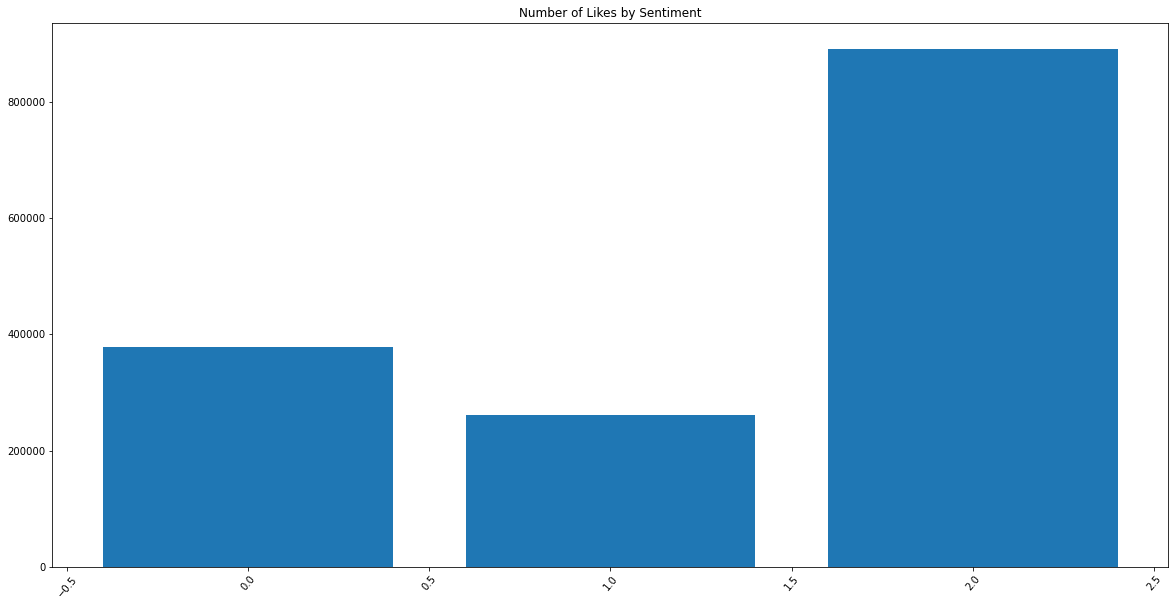

In [7]:
plt.figure(figsize=(20,10)) 
plt.bar(x=youtube_data['Sentiment'], height=youtube_data['Comment Likes'])
plt.xticks(rotation=50)
plt.title('Number of Likes by Sentiment')

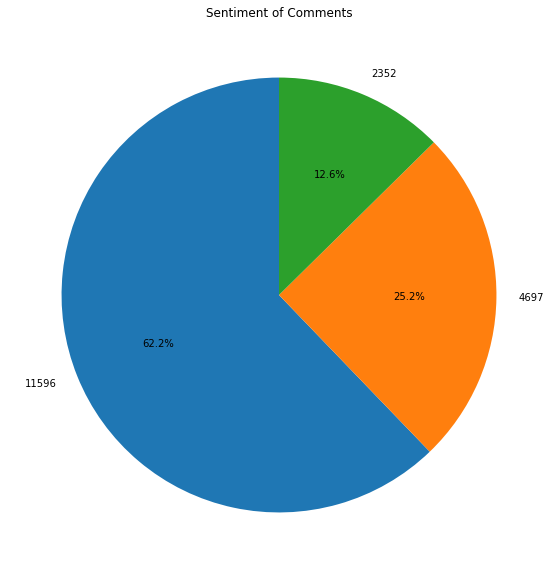

In [8]:
sentiment_data = youtube_data['Sentiment'].value_counts().rename_axis('Sentiment').reset_index(name='mood_counts')

plt.figure(figsize=(10,10))
plt.pie(sentiment_data.mood_counts, labels=sentiment_data.mood_counts, startangle=90, autopct='%.1f%%')
plt.title('Sentiment of Comments')
plt.show()

Text(0.5, 1.0, 'Number of Views by Topic')

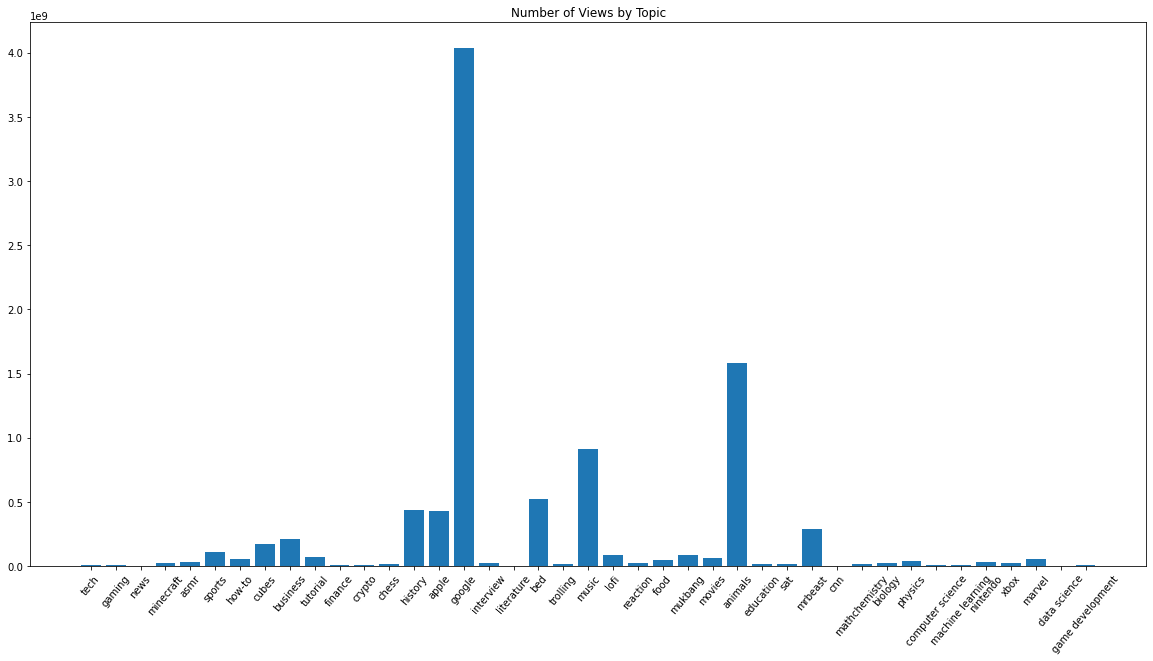

In [9]:

plt.figure(figsize=(20,10)) 
plt.bar(x=youtube_data['Keyword'], height=youtube_data['Views'])
plt.xticks(rotation=50)
plt.title('Number of Views by Topic')

Text(0.5, 1.0, 'Amount of Comments by Topic')

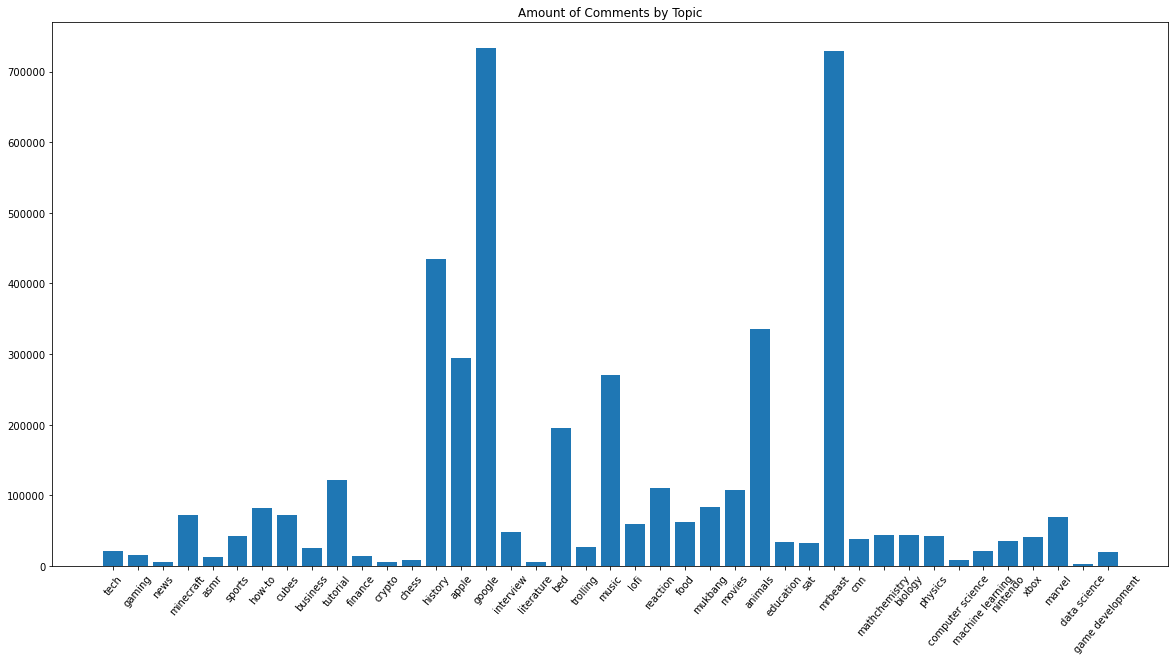

In [10]:
plt.figure(figsize=(20,10)) 
plt.bar(x=youtube_data['Keyword'], height=youtube_data['# of Comments'])
plt.xticks(rotation=50)
plt.title('Amount of Comments by Topic')